### Importación de datos



In [8]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [9]:
Ingreso_tienda1 = tienda1['Precio'].sum()
Ingreso_tienda2 = tienda2['Precio'].sum()
Ingreso_tienda3 = tienda3['Precio'].sum()
Ingreso_tienda4 = tienda4['Precio'].sum()

Ingreso_tienda1_ = tienda1['Precio'].sum() / 1000000
Ingreso_tienda2_ = tienda2['Precio'].sum() / 1000000
Ingreso_tienda3_ = tienda3['Precio'].sum() / 1000000
Ingreso_tienda4_ = tienda4['Precio'].sum() / 1000000

print(f'El ingreso de la tienda 1 fue {Ingreso_tienda1_:,.2f} millones de dolares')
print(f'El ingreso de la tienda 2 fue {Ingreso_tienda2_:,.2f} millones de dolares')
print(f'El ingreso de la tienda 3 fue {Ingreso_tienda3_:,.2f} millones de dolares')
print(f'El ingreso de la tienda 4 fue {Ingreso_tienda4_:,.2f} millones de dolares')

El ingreso de la tienda 1 fue 1,150.88 millones de dolares
El ingreso de la tienda 2 fue 1,116.34 millones de dolares
El ingreso de la tienda 3 fue 1,098.02 millones de dolares
El ingreso de la tienda 4 fue 1,038.38 millones de dolares


# 2. Ventas por categoría

In [11]:
ingreso_por_categoria_tienda1 = tienda1.groupby('Categoría del Producto')['Precio'].sum() / 1000000
ingreso_por_categoria_tienda2 = tienda2.groupby('Categoría del Producto')['Precio'].sum() / 1000000
ingreso_por_categoria_tienda3 = tienda3.groupby('Categoría del Producto')['Precio'].sum() / 1000000
ingreso_por_categoria_tienda4 = tienda4.groupby('Categoría del Producto')['Precio'].sum() / 1000000

ingreso_por_categoria_tienda1_sorted = ingreso_por_categoria_tienda1.sort_values(ascending=False)
ingreso_por_categoria_tienda2_sorted = ingreso_por_categoria_tienda2.sort_values(ascending=False)
ingreso_por_categoria_tienda3_sorted = ingreso_por_categoria_tienda3.sort_values(ascending=False)
ingreso_por_categoria_tienda4_sorted = ingreso_por_categoria_tienda4.sort_values(ascending=False)

In [13]:
#Ingreso por categoría en monto monetario
Ingreso_por_categoria_df = pd.DataFrame({
    'Tienda 1': ingreso_por_categoria_tienda1,
    'Tienda 2': ingreso_por_categoria_tienda2,
    'Tienda 3': ingreso_por_categoria_tienda3,
    'Tienda 4': ingreso_por_categoria_tienda4,
}).fillna(0).sort_values(by='Tienda 1', ascending=False)

print('Ingreso por categoría (en millones de dolares) \n',Ingreso_por_categoria_df)

Ingreso por categoría (en millones de dolares) 
                          Tienda 1  Tienda 2  Tienda 3  Tienda 4
Categoría del Producto                                         
Electrónicos             429.4935  410.8311  410.7758  409.4761
Electrodomésticos        363.6852  348.5678  329.2379  283.2602
Muebles                  187.6337  176.4263  201.0721  192.5289
Instrumentos musicales    91.2990  104.9903   77.3809   75.1024
Deportes y diversión      39.2900   34.7445   35.5931   33.3501
Juguetes                  17.9957   15.9454   19.4011   20.2622
Artículos para el hogar   12.6984   14.7469   15.0600   15.0745
Libros                     8.7849   10.0912    9.4987    9.3213


In [14]:
#Conteo de ventas por categoría

conteo_por_categoria_tienda1 = tienda1.groupby('Categoría del Producto').size().reset_index(name = "Cantidad").set_index('Categoría del Producto')
conteo_por_categoria_tienda2 = tienda2.groupby('Categoría del Producto').size().reset_index(name = "Cantidad").set_index('Categoría del Producto')
conteo_por_categoria_tienda3 = tienda3.groupby('Categoría del Producto').size().reset_index(name = "Cantidad").set_index('Categoría del Producto')
conteo_por_categoria_tienda4 = tienda4.groupby('Categoría del Producto').size().reset_index(name = "Cantidad").set_index('Categoría del Producto')


Conteo_por_categoria_df = pd.DataFrame({
    'Tienda 1': conteo_por_categoria_tienda1['Cantidad'],
    'Tienda 2': conteo_por_categoria_tienda2['Cantidad'],
    'Tienda 3': conteo_por_categoria_tienda3['Cantidad'],
    'Tienda 4': conteo_por_categoria_tienda4['Cantidad'],
}).fillna(0).sort_values(by='Tienda 1', ascending = False)

print('Conteo por categoría \n',Conteo_por_categoria_df)


Conteo por categoría 
                          Tienda 1  Tienda 2  Tienda 3  Tienda 4
Categoría del Producto                                         
Muebles                       465       442       499       480
Electrónicos                  448       422       451       451
Juguetes                      324       313       315       338
Electrodomésticos             312       305       278       254
Deportes y diversión          284       275       277       277
Instrumentos musicales        182       224       177       170
Libros                        173       197       185       187
Artículos para el hogar       171       181       177       201


In [15]:
Maximos_por_categoria_df = pd.DataFrame({
     'Tienda 1': (ingreso_por_categoria_tienda1.idxmax(), ingreso_por_categoria_tienda1.max()),
     'Tienda 2': (ingreso_por_categoria_tienda2.idxmax(), ingreso_por_categoria_tienda2.max()),
     'Tienda 3': (ingreso_por_categoria_tienda3.idxmax(), ingreso_por_categoria_tienda3.max()),
     'Tienda 4': (ingreso_por_categoria_tienda4.idxmax(), ingreso_por_categoria_tienda4.max()),
     })

print('Ingreso por categoría (en millones de dolares) \n',Maximos_por_categoria_df)

Ingreso por categoría (en millones de dolares) 
        Tienda 1      Tienda 2      Tienda 3      Tienda 4
0  Electrónicos  Electrónicos  Electrónicos  Electrónicos
1      429.4935      410.8311      410.7758      409.4761


In [17]:
#Esto no deberia ser con el de ingreso sino el contador

maximo_categoria_tienda1 = ingreso_por_categoria_tienda1.idxmax(), ingreso_por_categoria_tienda1.max()
maximo_categoria_tienda2 = ingreso_por_categoria_tienda2.idxmax(), ingreso_por_categoria_tienda2.max()
maximo_categoria_tienda3 = ingreso_por_categoria_tienda3.idxmax(), ingreso_por_categoria_tienda3.max()
maximo_categoria_tienda4 = ingreso_por_categoria_tienda4.idxmax(), ingreso_por_categoria_tienda4.max()

print(f'Los máximos por categoria de la tienda 1 son: {maximo_categoria_tienda1}')
print(f'Los máximos por categoria de la tienda 2 son: {maximo_categoria_tienda2}')
print(f'Los máximos por categoria de la tienda 3 son: {maximo_categoria_tienda3}')
print(f'Los máximos por categoria de la tienda 4 son: {maximo_categoria_tienda4}')

Los máximos por categoria de la tienda 1 son: ('Electrónicos', 429.4935)
Los máximos por categoria de la tienda 2 son: ('Electrónicos', 410.8311)
Los máximos por categoria de la tienda 3 son: ('Electrónicos', 410.7758)
Los máximos por categoria de la tienda 4 son: ('Electrónicos', 409.4761)


In [18]:
minimo_categoria_tienda1 = ingreso_por_categoria_tienda1.idxmin(), ingreso_por_categoria_tienda1.min()
minimo_categoria_tienda2 = ingreso_por_categoria_tienda2.idxmin(), ingreso_por_categoria_tienda2.min()
minimo_categoria_tienda3 = ingreso_por_categoria_tienda3.idxmin(), ingreso_por_categoria_tienda3.min()
minimo_categoria_tienda4 = ingreso_por_categoria_tienda4.idxmin(), ingreso_por_categoria_tienda4.min()

print(f'Los mínimos por categoria de la tienda 1 son: {minimo_categoria_tienda1}')
print(f'Los mínimos por categoria de la tienda 2 son: {minimo_categoria_tienda2}')
print(f'Los mínimos por categoria de la tienda 3 son: {minimo_categoria_tienda3}')
print(f'Los mínimos por categoria de la tienda 4 son: {minimo_categoria_tienda4}')

Los mínimos por categoria de la tienda 1 son: ('Libros', 8.7849)
Los mínimos por categoria de la tienda 2 son: ('Libros', 10.0912)
Los mínimos por categoria de la tienda 3 son: ('Libros', 9.4987)
Los mínimos por categoria de la tienda 4 son: ('Libros', 9.3213)


# 3. Calificación promedio de la tienda


In [19]:
calificacion_prom_tienda1 = tienda1['Calificación'].mean()
calificacion_prom_tienda2 = tienda2['Calificación'].mean()
calificacion_prom_tienda3 = tienda3['Calificación'].mean()
calificacion_prom_tienda4 = tienda4['Calificación'].mean()

print(f'La calificación promedio de la tienda 1 es: {calificacion_prom_tienda1:.2f}')
print(f'La calificación promedio de la tienda 2 es: {calificacion_prom_tienda2:.2f}')
print(f'La calificación promedio de la tienda 3 es: {calificacion_prom_tienda3:.2f}')
print(f'La calificación promedio de la tienda 4 es: {calificacion_prom_tienda4:.2f}')


La calificación promedio de la tienda 1 es: 3.98
La calificación promedio de la tienda 2 es: 4.04
La calificación promedio de la tienda 3 es: 4.05
La calificación promedio de la tienda 4 es: 4.00


# 4. Productos más y menos vendidos

In [20]:
# Más vendidos
mas_vendido_tienda1 = tienda1['Producto'].value_counts().idxmax()
mas_vendido_tienda2 = tienda2['Producto'].value_counts().idxmax()
mas_vendido_tienda3 = tienda3['Producto'].value_counts().idxmax()
mas_vendido_tienda4 = tienda4['Producto'].value_counts().idxmax()

print(f'El producto más vendido de la tienda 1 es: {mas_vendido_tienda1}')
print(f'El producto más vendido de la tienda 2 es: {mas_vendido_tienda2}')
print(f'El producto más vendido de la tienda 3 es: {mas_vendido_tienda3}')
print(f'El producto más vendido de la tienda 4 es: {mas_vendido_tienda4}')

# Menos vendidos
menos_vendido_tienda1 = tienda1['Producto'].value_counts().idxmin()
menos_vendido_tienda2 = tienda2['Producto'].value_counts().idxmin()
menos_vendido_tienda3 = tienda3['Producto'].value_counts().idxmin()
menos_vendido_tienda4 = tienda4['Producto'].value_counts().idxmin()

print(f'El producto menos vendido de la tienda 1 es: {menos_vendido_tienda1}')
print(f'El producto menos vendido de la tienda 2 es: {menos_vendido_tienda2}')
print(f'El producto menos vendido de la tienda 3 es: {menos_vendido_tienda3}')
print(f'El producto menos vendido de la tienda 4 es: {menos_vendido_tienda4}')


El producto más vendido de la tienda 1 es: Microondas
El producto más vendido de la tienda 2 es: Iniciando en programación
El producto más vendido de la tienda 3 es: Kit de bancas
El producto más vendido de la tienda 4 es: Cama box
El producto menos vendido de la tienda 1 es: Auriculares con micrófono
El producto menos vendido de la tienda 2 es: Juego de mesa
El producto menos vendido de la tienda 3 es: Bloques de construcción
El producto menos vendido de la tienda 4 es: Guitarra eléctrica


# 5. Envío promedio por tienda

In [21]:
envio_prom_tienda1 = tienda1['Costo de envío'].mean()
envio_prom_tienda2 = tienda2['Costo de envío'].mean()
envio_prom_tienda3 = tienda3['Costo de envío'].mean()
envio_prom_tienda4 = tienda4['Costo de envío'].mean()

print(f'El costo de envío promedio en la tienda 1 es: {envio_prom_tienda1:.2f}')
print(f'El costo de envío promedio en la tienda 2 es: {envio_prom_tienda2:.2f}')
print(f'El costo de envío promedio en la tienda 3 es: {envio_prom_tienda3:.2f}')
print(f'El costo de envío promedio en la tienda 4 es: {envio_prom_tienda4:.2f}')


El costo de envío promedio en la tienda 1 es: 26018.61
El costo de envío promedio en la tienda 2 es: 25216.24
El costo de envío promedio en la tienda 3 es: 24805.68
El costo de envío promedio en la tienda 4 es: 23459.46


In [22]:
import matplotlib.pyplot as plt

#Resumen
resumen = pd.DataFrame({
    "Facturación (M)": [
        tienda1['Precio'].sum()/1_000_000,
        tienda2['Precio'].sum()/1_000_000,
        tienda3['Precio'].sum()/1_000_000,
        tienda4['Precio'].sum()/1_000_000
    ],
    "Calificación promedio": [
        tienda1['Calificación'].mean(),
        tienda2['Calificación'].mean(),
        tienda3['Calificación'].mean(),
        tienda4['Calificación'].mean()
    ],
    "Envío promedio": [
        tienda1['Costo de envío'].mean(),
        tienda2['Costo de envío'].mean(),
        tienda3['Costo de envío'].mean(),
        tienda4['Costo de envío'].mean()
    ]
}, index=["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"])

print("\n📊 Resumen comparativo de las tiendas:\n")
print(resumen)


📊 Resumen comparativo de las tiendas:

          Facturación (M)  Calificación promedio  Envío promedio
Tienda 1        1150.8804               3.976685    26018.609580
Tienda 2        1116.3435               4.037304    25216.235693
Tienda 3        1098.0196               4.048326    24805.680373
Tienda 4        1038.3757               3.995759    23459.457167


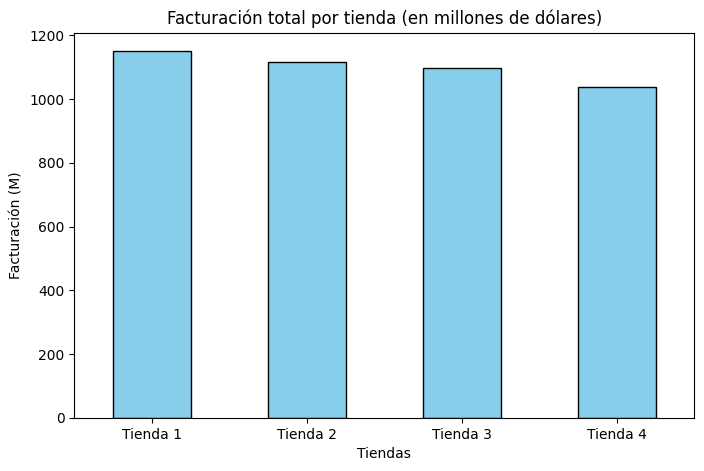

In [23]:
# Facturación total por tienda
plt.figure(figsize=(8,5))
resumen["Facturación (M)"].plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Facturación total por tienda (en millones de dólares)")
plt.ylabel("Facturación (M)")
plt.xlabel("Tiendas")
plt.xticks(rotation=0)
plt.show()

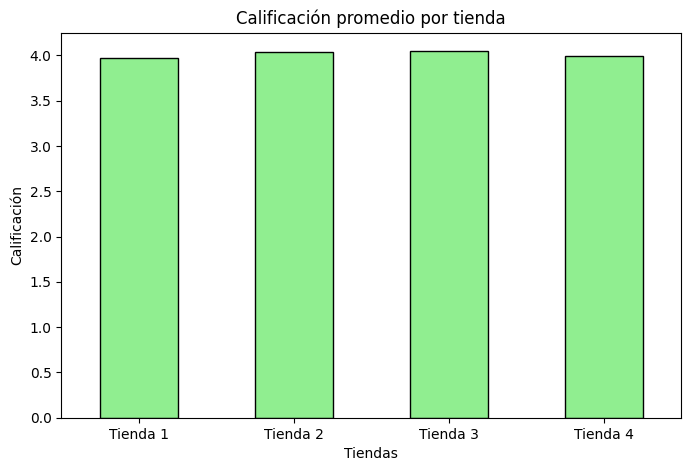

In [24]:
# Calificación promedio por tienda
plt.figure(figsize=(8,5))
resumen["Calificación promedio"].plot(kind="bar", color="lightgreen", edgecolor="black")
plt.title("Calificación promedio por tienda")
plt.ylabel("Calificación")
plt.xlabel("Tiendas")
plt.xticks(rotation=0)
plt.show()

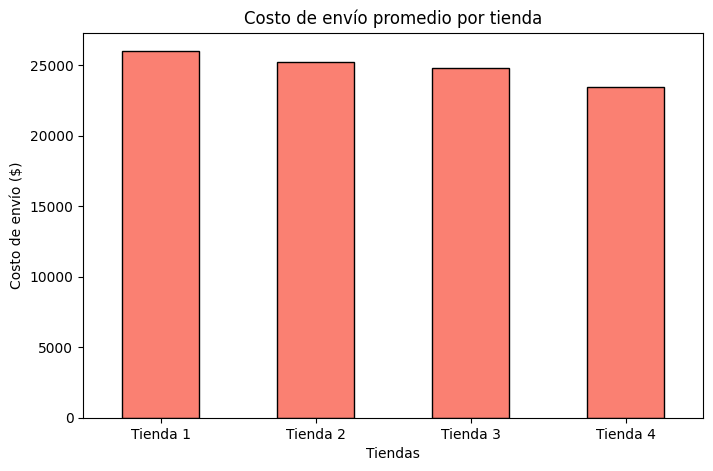

In [25]:
# Costo de envío promedio por tienda
plt.figure(figsize=(8,5))
resumen["Envío promedio"].plot(kind="bar", color="salmon", edgecolor="black")
plt.title("Costo de envío promedio por tienda")
plt.ylabel("Costo de envío ($)")
plt.xlabel("Tiendas")
plt.xticks(rotation=0)
plt.show()

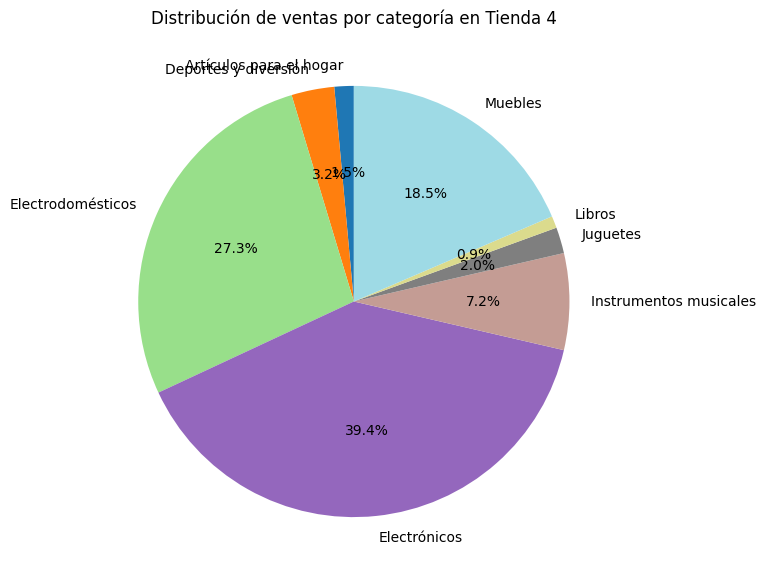

Recomendación final:
Se recomienda vender la Tienda 4 porque es la que menos ingresos genera y tiene menor atractivo para mantenerla en el negocio.


In [36]:
# Distribución de ventas por categoría en la tienda con menos ingresos
tienda_menos_facturacion = resumen["Facturación (M)"].idxmin()
if tienda_menos_facturacion == "Tienda 1":
    categoria_plot = tienda1.groupby("Categoría del Producto")["Precio"].sum()
elif tienda_menos_facturacion == "Tienda 2":
    categoria_plot = tienda2.groupby("Categoría del Producto")["Precio"].sum()
elif tienda_menos_facturacion == "Tienda 3":
    categoria_plot = tienda3.groupby("Categoría del Producto")["Precio"].sum()
else:
    categoria_plot = tienda4.groupby("Categoría del Producto")["Precio"].sum()

plt.figure(figsize=(7,7))
categoria_plot.plot(kind="pie", autopct="%1.1f%%", startangle=90, colormap="tab20")
plt.title(f"Distribución de ventas por categoría en {tienda_menos_facturacion}")
plt.ylabel("")
plt.show()

#Recomendación
peor_tienda = resumen.sort_values(by=["Facturación (M)", "Calificación promedio"], ascending=[True, True]).head(1)
print("Recomendación final:")
print(f"Se recomienda vender la {peor_tienda.index[0]} porque es la que menos ingresos genera y tiene menor atractivo para mantenerla en el negocio.")